In [10]:
import torch
import numpy as np

In [2]:
import sys
sys.path.insert(0, "..")

In [4]:
from evaluation.EvalRSRunner import ChallengeDataset

In [5]:
dataset = ChallengeDataset()

/home/fgiobergia/.cache/evalrs/evalrs_dataset
LFM dataset already downloaded. Skipping download.
Loading dataset.
Generating folds.
Generating dataset hashes.


In [6]:
train, test = dataset.get_sample_train_test()

In [7]:
from cluster import get_users_clusters

In [23]:
def get_track_rel_weight(train_df, trait):
    # trait: artist_id, track_id, user_id
    gb = train_df.groupby(trait)["user_track_count"].sum()
    ndx = gb.index.tolist()
    weights = 1/np.log(gb.values+1)
    # weights = (weights - weights.min()) / (weights.max() - weights.min())
    weights = weights / weights.sum()

    mapper = dict(zip(ndx, weights))
    return train_df[trait].map(mapper.get)

def get_user_rel_weight(train_df, users_df, trait):
    # train in ["gender", "country"]
    gb = users_df.fillna("n").groupby(trait).size()
    ndx = gb.index.tolist()
    if trait == "gender":
        weights = gb.values
    else:
        weights = 1/np.log(gb.values+1)
    # weights = (weights - weights.min()) / (weights.max() - weights.min())
    weights = weights / weights.sum()

    mapper = dict(zip(ndx, weights))
    df_merged = train_df.merge(users_df.fillna("n"), left_on="user_id", right_index=True)
    return df_merged[trait].map(mapper.get)

In [24]:

# l = {
#     "artist_id": 1.,
#     "track_id": 1.,
#     "gender": 1.,
#     "country": 1.,
#     "user_id": 1.,
# }
# weights = get_track_rel_weight(train, "artist_id") * l["artist_id"] + \
#         get_track_rel_weight(train, "track_id") * l["track_id"] + \
#         get_track_rel_weight(train, "user_id") * l["user_id"] + \
#         get_user_rel_weight(train, dataset.df_users, "gender") * l["gender"] + \
#         get_user_rel_weight(train, dataset.df_users, "country") * l["country"]

w = {
    "artist_id": get_track_rel_weight(train, "artist_id"),
    "track_id": get_track_rel_weight(train, "track_id"),
    "user_id": get_track_rel_weight(train, "user_id"),
    "gender": get_user_rel_weight(train, dataset.df_users, "gender"),
    "country": get_user_rel_weight(train, dataset.df_users, "country")
}


In [26]:
w["artist_id"].max()

8.859461708364219e-05

In [30]:
from functools import reduce

2

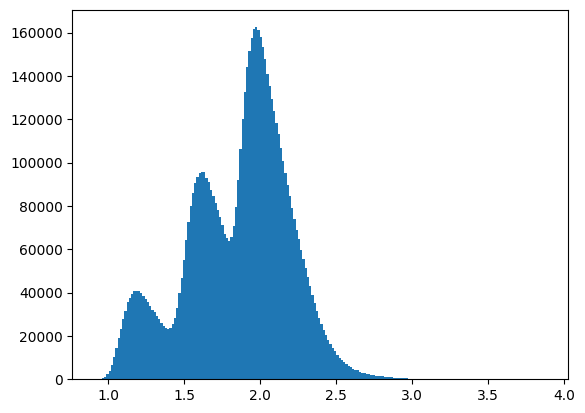

In [40]:

l = {
    "artist_id": 1e4,
    "track_id": 1e5,
    "gender": 2.,
    "country": 100.,
    "user_id": 1e4,
}

plt.hist(reduce(lambda a,b: a+b, [ w[k] * l[k] for k in l]),bins=200)
2

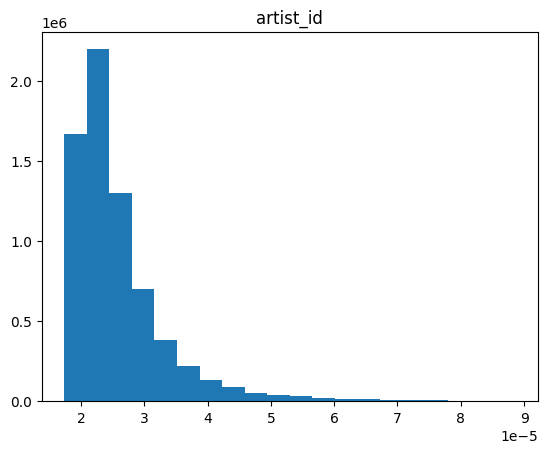

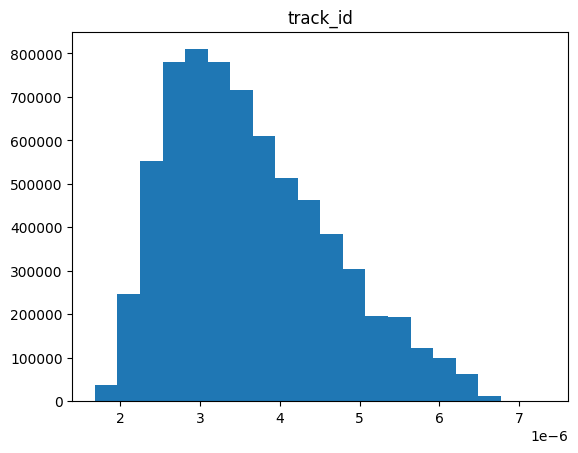

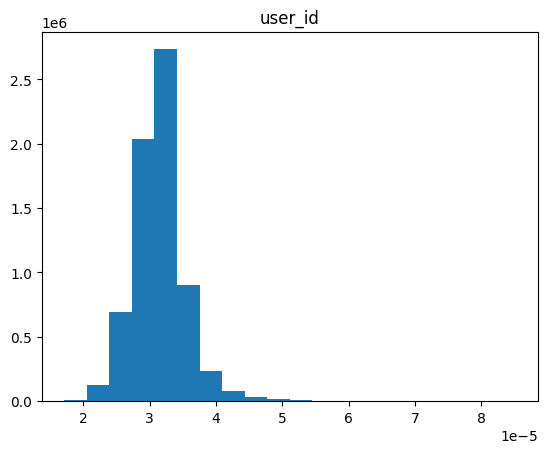

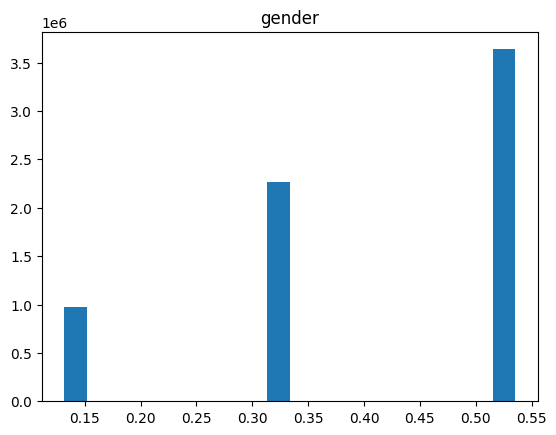

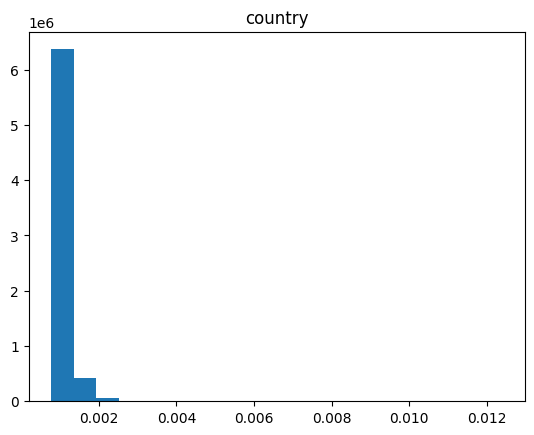

In [25]:
for k in w:
    plt.figure()
    plt.title(k)
    plt.hist(w[k], bins=20)

In [14]:
import matplotlib.pyplot as plt

(array([ 970493.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
        2269995.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0., 3637261.]),
 array([0.13168834, 0.13976178, 0.14783522, 0.15590866, 0.1639821 ,
        0.17205554, 0.18012898, 0.18820242, 0.19627586, 0.2043493 ,
        0.21242273, 0.22049617, 0.22856961, 0.23664305, 0.24471649,
        0.25278993, 0.26086337, 0.26893681, 0.27701025, 0.28508369,
        0.29315712, 0.30123056, 0.309304  , 0.31737744, 0.32545088,
        0.33352432, 0.34159776, 0.3496712 , 0.35774464, 0.36581808,
        0.37389151

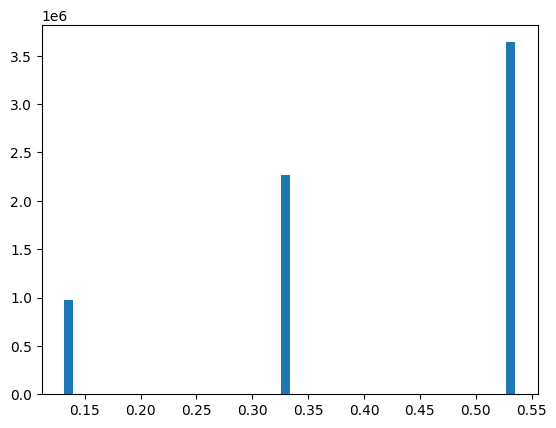

In [17]:
plt.hist(weights, bins=50)